<a href="https://colab.research.google.com/github/jairbenavides0520-dotcom/Jair/blob/main/AF5_Procesamiento_De_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AF 5: Procesamiento de conjuntos de datos en Python
Miembros de equipo Jueves N4-N6
Jesus Román Aguirre Hernandez 2053240
Jair Eduardo Benavides García 2052989
Sarahi Montserrat Barba Botello 204150
Raúl Alejandro Garza Elizondo 2066224


DESCRIPCION DEL PROYECTO

En esta actividad se usaran con un conjunto de datos obtenidos de los sensores de un robot movil, el cual nos dio informacion relacionada con variables en el tiempo, distancia recorrida y la vrlocidad alcanzada, ademas su temperatura en su funcionamiento. El primer paso consta en cargar el dataset utilizando la libreria "pandas" y poder mostrar las primeras filas para poder visualizar el formato de los datos, despues de eso verificamos si existen algunos valores nulos. Despues realizamos una normalizacion mediante valores minimos y maximos, y asi nos facilito la comparacion. Despues se usara matplobib para la visualizacion grafica de los datos procesados, usando graficas para demostrar de manera visual el comportamiento de cada variable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Fuente: https://github.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/blob/main/MachineLearning/Datasets/robot_sensors.csv
df = pd.read_csv('robot_sensors.csv')

In [ ]:
# Muestra las primeras 8 líneas de datos.
print(df.head(8))

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246
5           5       24.039507         32.939168         31.390974
6           6       15.227525         34.613828         26.746098
7           7       87.955853         42.459783         31.650658


In [ ]:
# Obtén información sobre las columnas y el tipo de datos de cada una.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None


In [ ]:
# Propiedades totales
print(df.shape)

(1000, 4)


In [ ]:
# Para la limpieza de datos
# Verifica si hay valores nulos (missing values) en alguna columna y cómo manejarlos.
print(df.isnull().sum())

Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


In [ ]:
df['Distancia (cm)'] = df['Distancia (cm)'].fillna(df['Distancia (cm)'].mean())
df['Velocidad (cm/s)'] = df['Velocidad (cm/s)'].fillna(df['Velocidad (cm/s)'].mean())
df['Temperatura (°C)'] = df['Temperatura (°C)'].fillna(df['Temperatura (°C)'].mean())

In [ ]:
# Comprobacion de valores nulos eliminados
print(df.isnull().sum())

Tiempo (s)          0
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


In [ ]:
# Filtrar velocidad negativa
df_velocidad = df[df['Velocidad (cm/s)'] < 0]
print((df['Velocidad (cm/s)'] < 0).sum())

0


In [ ]:
# Distancia máxima y mínima
distancia_max = df.loc[df['Distancia (cm)'].idxmax()]
distancia_min = df.loc[df['Distancia (cm)'].idxmin()]
print("Mayor distancia:")
print(distancia_max)
print("Menor distancia:")
print(distancia_min)

Mayor distancia:
Tiempo (s)          531.000000
Distancia (cm)       99.974591
Velocidad (cm/s)     30.516689
Temperatura (°C)     32.427039
Name: 531, dtype: float64
Menor distancia:
Tiempo (s)          821.000000
Distancia (cm)       10.416882
Velocidad (cm/s)      6.069321
Temperatura (°C)     23.430152
Name: 821, dtype: float64


In [ ]:
# Distancia máxima y mínima
distancia_max = df.loc[df['Distancia (cm)'].idxmax()]
distancia_min = df.loc[df['Distancia (cm)'].idxmin()]
print("Mayor distancia:")
print(distancia_max)
print("Menor distancia:")
print(distancia_min)

# Velocidad máxima y mínima
velocidad_max = df.loc[df['Velocidad (cm/s)'].idxmax()]
velocidad_min = df.loc[df['Velocidad (cm/s)'].idxmin()]
print("Mayor velocidad:")
print(velocidad_max)
print("Menor velocidad:")
print(velocidad_min)

# Temperatura máxima y mínima
temperatura_max = df.loc[df['Temperatura (°C)'].idxmax()]
temperatura_min = df.loc[df['Temperatura (°C)'].idxmin()]


Mayor distancia:
Tiempo (s)          531.000000
Distancia (cm)       99.974591
Velocidad (cm/s)     30.516689
Temperatura (°C)     32.427039
Name: 531, dtype: float64
Menor distancia:
Tiempo (s)          821.000000
Distancia (cm)       10.416882
Velocidad (cm/s)      6.069321
Temperatura (°C)     23.430152
Name: 821, dtype: float64
Mayor velocidad:
Tiempo (s)          464.000000
Distancia (cm)       96.595529
Velocidad (cm/s)     49.970686
Temperatura (°C)     29.309907
Name: 464, dtype: float64
Menor velocidad:
Tiempo (s)          921.000000
Distancia (cm)       53.868808
Velocidad (cm/s)      0.160913
Temperatura (°C)     30.689320
Name: 921, dtype: float64


In [ ]:
#Normalización
columnas = ['Distancia (cm)', 'Velocidad (cm/s)','Temperatura (°C)',]

scaler = MinMaxScaler()
df[columnas] = scaler.fit_transform(df[columnas])

print("Datos normalizados:")

print(df.head())

Datos normalizados:
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0        0.371735          0.182609          0.262269
1           1        0.950755          0.540740          0.247509
2           2        0.730954          0.873049          0.908233
3           3        0.596960          0.731791          0.250082
4           4        0.152134          0.806411          0.272535


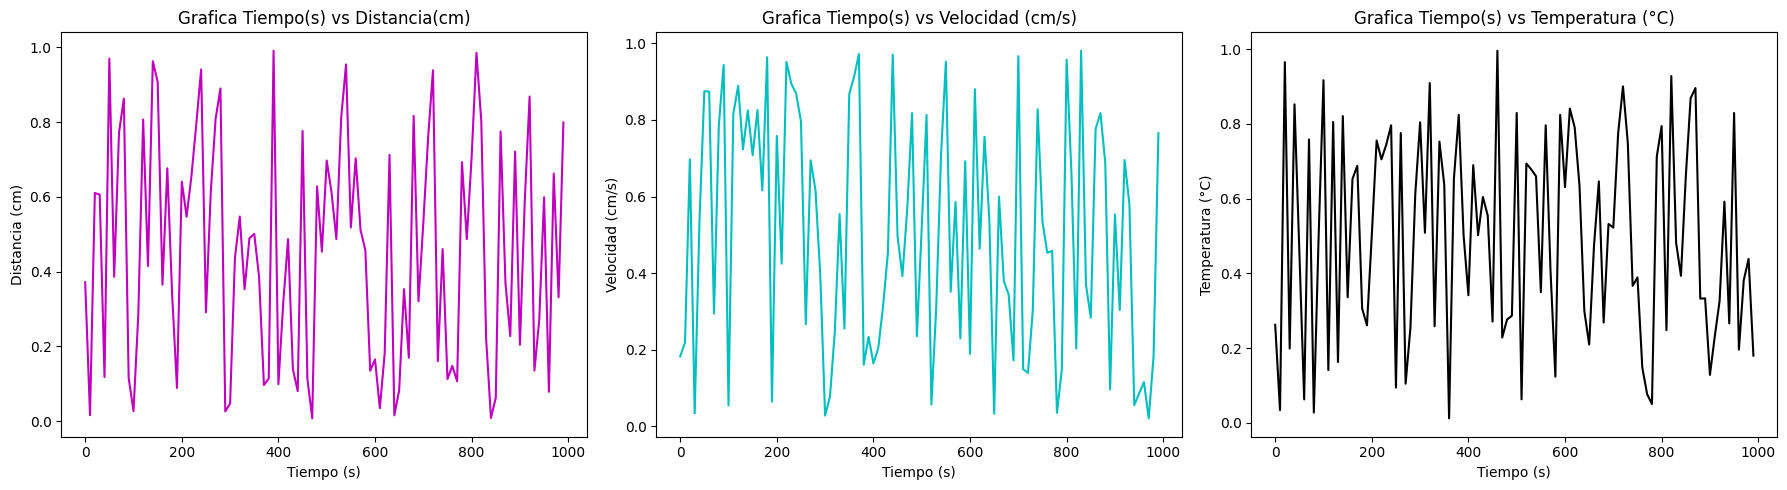

In [ ]:
# Se usara 1 de cada 10 datos para la grafica
df_sample = df.iloc[::10, :]

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(df_sample['Tiempo (s)'], df_sample['Distancia (cm)'], 'm-')
plt.title("Grafica Tiempo(s) vs Distancia(cm)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (cm)")
plt.grid(False)


plt.subplot(1,3,2)
plt.plot(df_sample['Tiempo (s)'], df_sample['Velocidad (cm/s)'], 'c-')
plt.title("Grafica Tiempo(s) vs Velocidad (cm/s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")
plt.grid(False)


plt.subplot(1,3,3)
plt.plot(df_sample['Tiempo (s)'], df_sample['Temperatura (°C)'], 'k-')
plt.title("Grafica Tiempo(s) vs Temperatura (°C)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.grid(False)


plt.tight_layout()
plt.show()